In [3]:
import wave
import sys
import matplotlib.pyplot as plt
#import numpy as np
from scipy.io.wavfile import read
import librosa.display
import numpy as np

w_amy = read('../Data/amy.wav')
w_brian = read('../Data/brian.wav')

In [4]:
rate,audio = read('../Data/amy.wav')

In [5]:
audio = np.mean(audio,axis = 1)

In [6]:
import librosa

In [95]:
import numpy as np

def spectral_properties(y: np.ndarray, fs: int) -> dict:
    spec = np.abs(np.fft.rfft(y))
    plt.plot(spec)
    plt.show()
    freq = np.fft.rfftfreq(len(y), d=1 / fs)
    spec = np.abs(spec)
    plt.plot(y)
    plt.show()
    print(freq[0].mean())
    plt.title("frequency")
    plt.scatter(range(10),freq[:10])
    plt.show()
    print(spec)
    amp = spec / spec.sum()
    plt.plot(amp)
    plt.show()
    mean = (freq * amp).sum()
    sd = np.sqrt(np.sum(amp * ((freq - mean) ** 2)))
    amp_cumsum = np.cumsum(amp)
    median = freq[len(amp_cumsum[amp_cumsum <= 0.5]) + 1]
    mode = freq[amp.argmax()]
    Q25 = freq[len(amp_cumsum[amp_cumsum <= 0.25]) + 1]
    Q75 = freq[len(amp_cumsum[amp_cumsum <= 0.75]) + 1]
    IQR = Q75 - Q25
    z = amp - amp.mean()
    w = amp.std()
    skew = ((z ** 3).sum() / (len(spec) - 1)) / w ** 3
    kurt = ((z ** 4).sum() / (len(spec) - 1)) / w ** 4
    sp_entr = -np.sum(amp*  np.log(amp))/np.log(len(amp))
    
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y))
    result_d = {
        'mean': mean,
        'sd': sd,
        'median': median,
        'mode': mode,
        'Q25': Q25/fs,
        'Q75': Q75,
        'IQR': IQR,
        'skew': skew,
        'kurt': kurt,
        'sp.ent':sp_entr,
        'sfm' : spectral_flatness,
    }

    return result_d

In [96]:
samples, sample_rate = librosa.load('../Data/amy.wav')

In [97]:
samples

array([ 1.3444628e-08, -1.6950109e-08,  2.0610068e-08, ...,
       -1.7379138e-05, -1.0671355e-05,  3.6047368e-07], dtype=float32)

In [98]:
sample_rate

22050

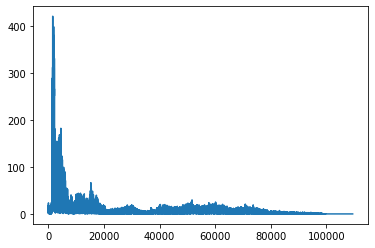

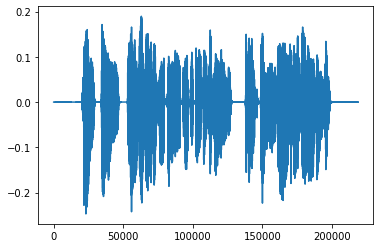

0.0


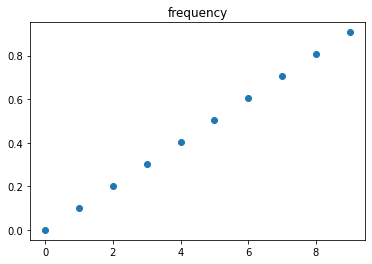

[9.06823432e+00 2.41760981e+00 3.53926788e+00 ... 1.14625380e-05
 1.02045197e-05 8.12592148e-05]


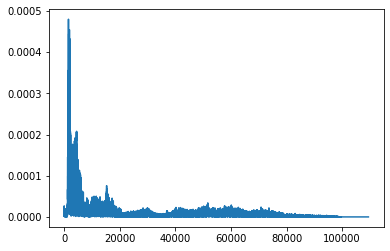

/tmp/ipykernel_34483/3433606023.py:33: FutureWarning: Pass y=[ 1.3444628e-08 -1.6950109e-08  2.0610068e-08 ... -1.7379138e-05
 -1.0671355e-05  3.6047368e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_flatness = np.mean(librosa.feature.spectral_flatness(y))


{'mean': 2504.699129246611,
 'sd': 2605.7576185498033,
 'median': 1270.1780035820022,
 'mode': 160.4848952812603,
 'Q25': 0.016808911144413175,
 'Q75': 4700.101886033846,
 'IQR': 4329.465395299536,
 'skew': 7.861372679938718,
 'kurt': 89.89374716632535,
 'sp.ent': 0.9179433287706321,
 'sfm': 0.037058156}

In [99]:
spectral_properties(samples,sample_rate)

In [100]:
rate, audio  = read("../CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav")

In [101]:
import pandas as pd
pd.read_csv('../Data/Amy-Acoustics.csv')

,Unnamed: 0,sound.files,selec,duration,meanfreq,sd,median,Q25,Q75,IQR,...,centroid,peakf,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,amy.wav,0,20,0.183064,0.046934,0.183643,0.156127,0.212469,0.056343,...,0.183064,0,0.154861,0.043278,0.275625,0.990816,0,7.170557,7.170557,0.102383
